* Прогружаем все библиотеки, которые нам могут пригодиться!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly
import plotly.express as px


* RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
* CustomerId — идентификатор клиента
* Surname — фамилия клиента
* CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
* Geography — страна клиента (банк международный)
* Gender — пол клиента
* Age — возраст клиента
* Tenure — сколько лет клиент пользуется услугами банка
* Balance — баланс на счетах клиента в банке
* NumOfProducts — количество услуг банка, которые приобрёл клиент
* HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
* IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
* EstimatedSalary — предполагаемая заработная плата клиента
* Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

* сохраняем в переменную таблицу оттока клиентов из банка. И убираем столбец RowNumber

In [2]:
churn_data_1 = pd.read_csv('churn.csv')
churn_data = churn_data_1.drop(columns = 'RowNumber')
display(churn_data.head())
display(churn_data.info())


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


None

##### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

Exited
лояльный клиент    7963
ушедший клиент     2037
Name: count, dtype: int64

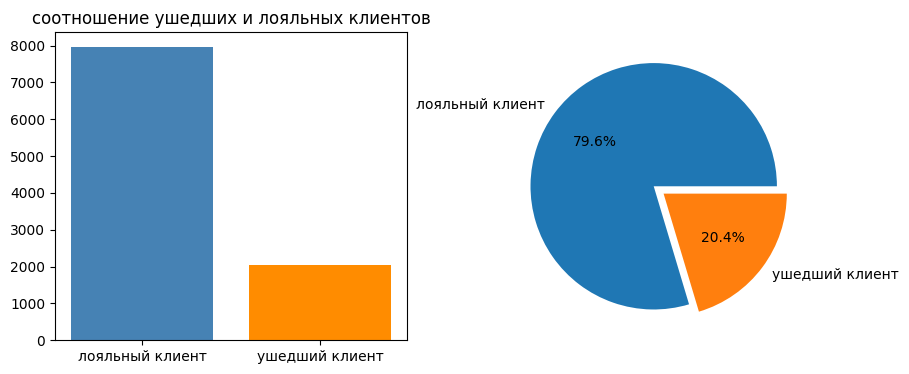

In [3]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plot_1 = churn_data.copy()
plot_1['Exited'] = plot_1['Exited'].astype('object')
plot_1['Exited'] = plot_1['Exited'].apply(lambda x:'ушедший клиент' if x == 1 else 'лояльный клиент')
new_plot = plot_1['Exited'].value_counts()
display(new_plot)


axes[0].bar(x=new_plot.index,
           height=new_plot,
           color=['steelblue','darkorange']);
axes[0].set_title('соотношение ушедших и лояльных клиентов');

axes[1].pie(new_plot,
            labels=new_plot.index,
            autopct='%.1f%%',
            explode = [0, 0.1]);

##### ВЫВОД:
* На данном графике мы видим, что общее количество клиентов около 10 тыс. человек, из них 20%(каждый пятый клиент) это ушедшие клиенты по разным причинам.
* Это наталкивает на мысль, что партнеры, которые ушли, не могут найти для себя выгодное предложение или не устраивает сервис.
* Тут мы можем сказать так же, что нам надо больше информации, для понимания причин такого оттока клиентов.

#### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

/tmp/ipykernel_4498/1693804113.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = plot_1[mask][mask2]


<Axes: xlabel='Balance', ylabel='Count'>

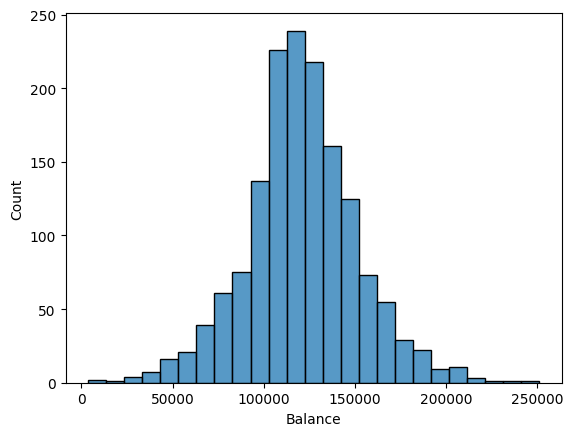

In [16]:
mask = plot_1['Balance']>2500 
mask2 = plot_1['Exited'] == 'ушедший клиент'
a = plot_1[mask][mask2]
sns.histplot(
    data=a,
    x='Balance',
    bins=25
)








##### ВЫВОД:
* 24% от общего числа клиентов,у кого на счету более 2500$ оказались те люди, которые отказались от услуг данного банка. 75% от общего числа покинувших банк(1537 из 2037). Это говорит о том, что для данного класса держателей нет подходящей программы или выгодных условий. Либо что-то случилось в стране и люди поспешили снять д.с., либо клиенты переходят в другой банк, где предлагают более высокие проценты по вкладам или лучше сервис.

#### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

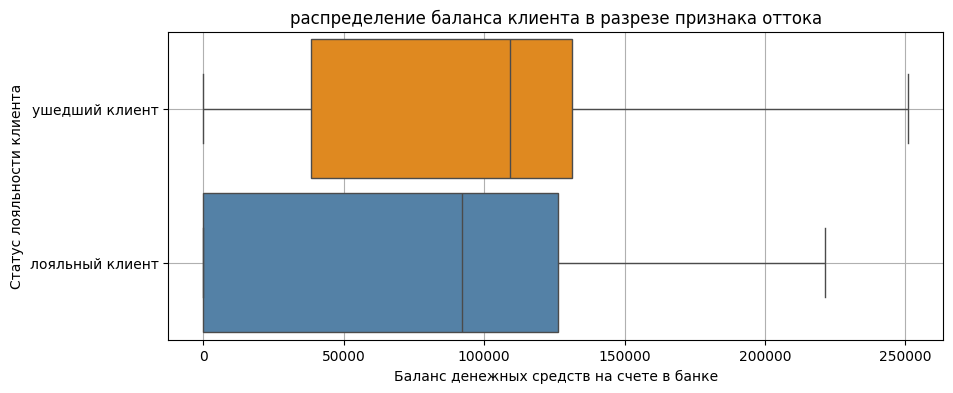

In [80]:
fig = plt.figure(figsize = (10,4))
plot_3 = sns.boxplot(data=plot_1,
                     y='Exited',
                     x='Balance',
                     hue= 'Exited',               
                     orient='h',
                     width=0.9,
                     palette=['darkorange','steelblue'])
plot_3.set_title('распределение баланса клиента в разрезе признака оттока')
plot_3.set_xlabel('Баланс денежных средств на счете в банке')
plot_3.set_ylabel('Статус лояльности клиента')
plot_3.grid()


##### ВЫВОД:
* Размеры накоплений у клиентов, кто ушел в большей своей части находится в отрезке от 40 000$ до 140 000$, когда у лояльных клиентов этот отрезок от 0$ до 130 000$.
* Так же мы видим, что в первом случае разброс в большую сторону достигает 250 000$, когда у лояльных эта цифра ниже 220 000$
* Так же медиана в первом случае больше чем медиана во втором.(ушедший - 110 тыс.$, лояльный -90 тыс.$)
* Все это говорит о том, что 50% из ушедших имели на счетах суммы больше 110 тыс. долларов. Это в большей части своей VIP клиенты. 
* Мое предположение остается тем же, либо ситуация в стране сподвигнула людей начать снимать свои накопления, либо это работа другого банка(обслуживание и сервис)
* Так же может быть, что банк перестал работать как раньше(санкции, ограничения).


#### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

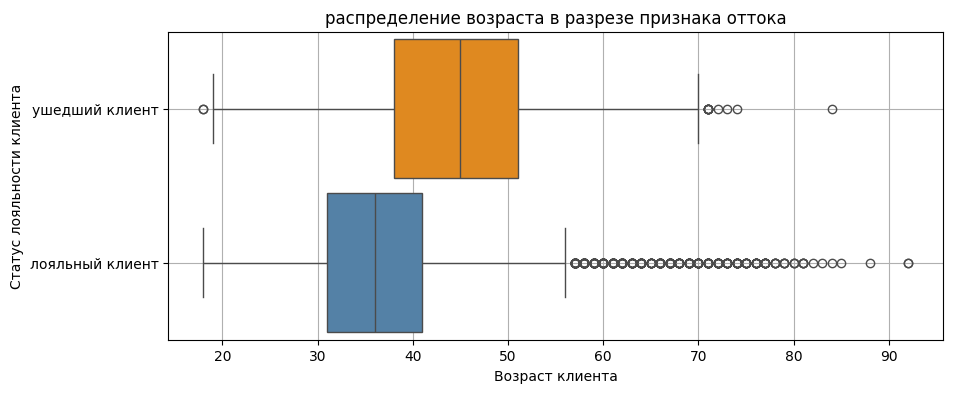

In [79]:
fig = plt.figure(figsize = (10,4))
plot_4 = sns.boxplot(data=plot_1,
                    y='Exited',
                    x='Age',
                    orient='h',
                    width=0.9,
                    palette=['darkorange','steelblue'],
                    hue='Exited')                                   
plot_4.set_title('распределение возраста в разрезе признака оттока')
plot_4.set_xlabel('Возраст клиента')
plot_4.set_ylabel('Статус лояльности клиента')
plot_4.grid()

##### ВЫВОД:
* Основной возраст клиентов, которые уходят, это от 38 до 52 лет, люди, которые уже взрослые и состоявшиеся, у которых появляется все больше времени анализировать ситуацию в стране. Люди, которые изучают информации от разных банков и те, которые уже давно держат свои вклады на счетах банка, в силу возраста. 
* Возраст лояльных клиентов на порядок ниже и является от 32 лет до 40. Это тот класс людей, кто занят детьми, ипотекой и улучшением ситуации в семье. Поэтому для них удобно держать д.с. в том банке, где они их разместили изначально. 
* Наблюдается много аномалий в этом секторе, скорее всего не верные данные о возрасте. Возможно со стороны банка необходимо данных парнеров перепроверить и обновить информацию. Либо это действительно так(еденичные случаи) и на это обязательно стоит обратить внимание. 



#### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

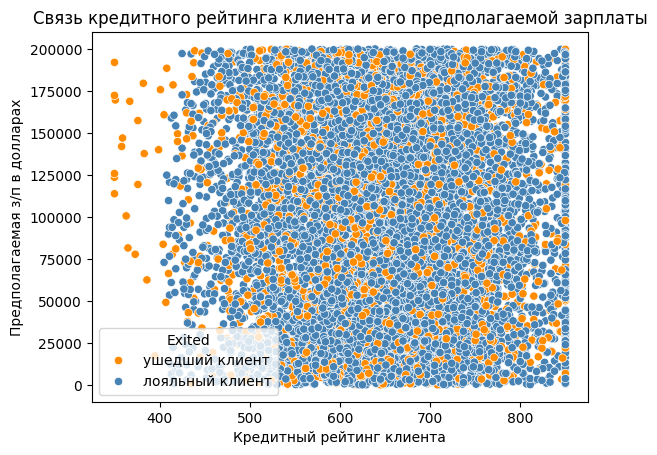

In [121]:

plot_5 = sns.scatterplot(
    data=plot_1,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    palette=['darkorange','steelblue'])
plot_5.set_title('Связь кредитного рейтинга клиента и его предполагаемой зарплаты');
plot_5.set_ylabel('Предполагаемая з/п в долларах');
plot_5.set_xlabel('Кредитный рейтинг клиента');


##### ВЫВОД:
* Как таковой ярковыраженной связи не наблюдается, точки распределены по всему графику. Это говорит о том, что ушедшие клиенты это клиенты, которые раньше были лояльные к банку и были стабильными партнерами. Но есть и партнеры, которые имеют ниже 400 балов рейтинга.

#### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
* т.к. в столбце "Лояльность клиента" ушедшие отмечены 1, то это значит при среднем будут считаться только 1.

Gender
Female    1139
Male       898
Name: Exited, dtype: int64

Gender
Female    0.25
Male      0.16
Name: Exited, dtype: float64

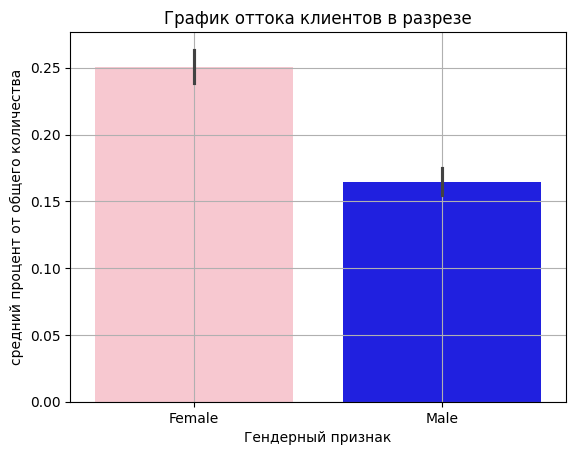

In [197]:
display(churn_data.groupby('Gender')['Exited'].sum())
display(round(churn_data.groupby('Gender')['Exited'].mean(),2))
plot_6=sns.barplot(
    data=churn_data,
    x='Gender',
    y='Exited',
    palette=['pink','blue'],
    hue='Gender');
                      

plot_6.set_title('График оттока клиентов в разрезе')

plot_6.set_xlabel('Гендерный признак')
plot_6.set_ylabel('средний процент от общего количества')
plot_6.grid()


##### ВЫВОД:
* В списке ушедших преобладают женщины. Если взять в числовом выражении, то из 2037 человек, кто ушел 1139-женщины, 898-мужчины.По графику так же видно, что женщины чаще покидают банк, чем мужчины.

#### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

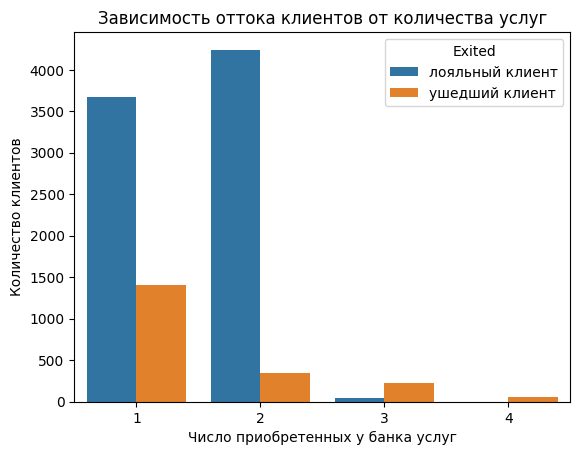

In [130]:
pl = plot_1.groupby(['Exited','NumOfProducts'],as_index=False)['CustomerId'].count()

plot_7 = sns.barplot(
    data=pl,
    x='NumOfProducts',
    y='CustomerId',
    hue='Exited',)
plot_7.set_title('Зависимость оттока клиентов от количества услуг');
plot_7.set_xlabel('Число приобретенных у банка услуг');
plot_7.set_ylabel('Количество клиентов');

##### ВЫВОД: 
* На данном графике отчетливо видно, что в списке лояльных клиентов 95% клиентов, это те, кто имеет 1-2 услуги, когда в списке ушедших из 2037 партнеров около 500 имеют по 3-4 услуги и вклады их достигают 250 тыс. долларов. Крупные клиенты покидают банк из-за очень везких причин.

#### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

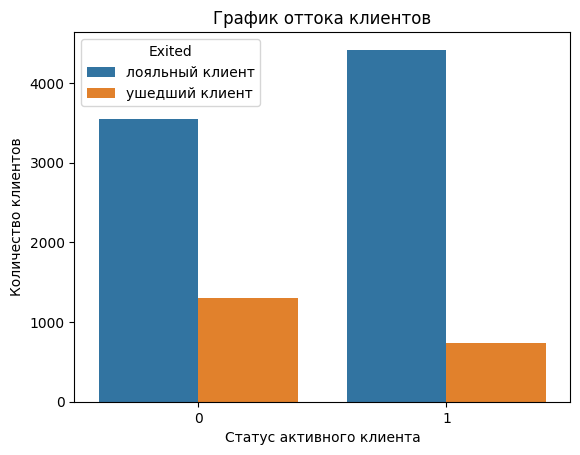

In [196]:

pl_1 = plot_1.groupby(['Exited','IsActiveMember'],as_index=False)['CustomerId'].count()

plot_8 = sns.barplot(
    data=pl_1,
    x='IsActiveMember',
    y='CustomerId',
    hue='Exited',)

plot_8.set_title('График оттока клиентов');
plot_8.set_xlabel('Статус активного клиента');
plot_8.set_ylabel('Количество клиентов');

##### ВЫВОД:
* Как видно из графика больше половина партнеров из списка ушедших являются неактивными. Я бы посоветовал банку направить все свое внимание на эту группу клиентов, обзванивать, вести опрос довольны они ими или нет, что улучшить и т д. Так же предложить более выгодные условия для сотрудничества, кредит на низких процентных ставках, при этом стать зарплатным клиентом банка, так же предложить оплачивать комунальные услуги через сервис банка. Предложить личного менеджера, если его нет. Вклады более выгодные. Что бы клиент был не только держателем крупной суммы, но и чувствовал со стороны банка заинтересованность в себе. Предложить кредитные карты так же для более частого пользования банком при оплатах, кэшбек. Предложить выгодный курс обмена валют, если это необходимо партнеру.

#### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [176]:

info_1 = churn_data.groupby(['Exited','Geography'])['CustomerId'].count()
display(info_1)
plot_9 = churn_data.groupby('Geography',as_index=False)['Exited'].mean()
display(plot_9)
fig =px.choropleth(
   data_frame=plot_9, 
    locations="Geography", 
    locationmode = "country names", 
    color='Exited', 
   title='Доля ушедших клиентов',
    width=800, 
   height=500,
    color_continuous_scale='Oranges') 

fig.show()

Exited  Geography
0       France       4204
        Germany      1695
        Spain        2064
1       France        810
        Germany       814
        Spain         413
Name: CustomerId, dtype: int64

,Geography,Exited
0,France,0.161548
1,Germany,0.324432
2,Spain,0.166734


##### ВЫВОД:
* Как мы видим на графике, в Германии самая высокая доля ушедших клиентов из банка. Связано это с продолжением СВО и высокими ценами на энергоресурсы и на удобрения,т.к. это промышленная страна.Многие крупные игроки в бизнесе начали переезжать в штаты. Рабочие места сокращаются, а инфляция растет.

#### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

* Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [177]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [187]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)


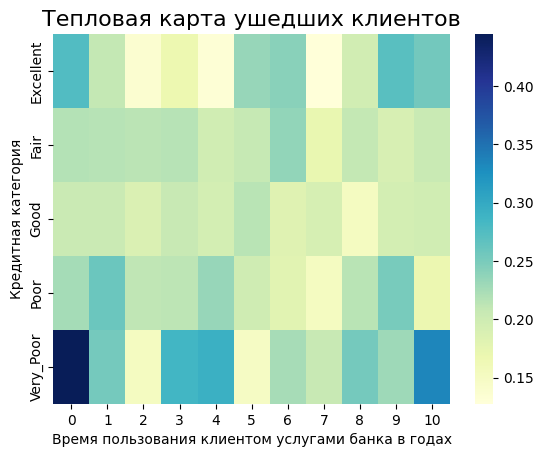

In [195]:
churn_data['CreditScoreCat'].value_counts()
pivot = churn_data.pivot_table(
    values= 'Exited',
    index='CreditScoreCat',
    columns='Tenure')
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта ушедших клиентов', fontsize=16);
heatmap.set_xlabel('Время пользования клиентом услугами банка в годах');
heatmap.set_ylabel('Кредитная категория');
  


##### ВЫВОД:
* Самый высокий показатель ухода партнера от банка, это кто пользуется до 6 мес. банком. И естественно у таких партнеров нет высокой кредитной категории. Большенство новых клиентов уходит. Скорее всего у банка нет хороших и выгодных предложений для новых клиентов по вкладам и обслуживанию либо это сзязано с мошенниками, кто открывает счет на короткий срок, что бы через него прошли д.с. и следом закрывают его. Так же есть активность у клиентов, которые за 10 лет имеют низкую категорию. Возможно связано с тем, что опять же партнерам мало предлагают услуг, что бы банк стал их единственным партнером. 